Daniel Velasquez

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

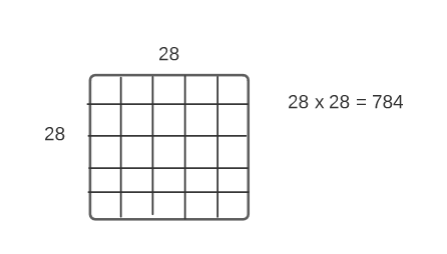

In [2]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header = None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0
mean,4.470200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215000,0.087700,0.036500,0.013650,0.032600,0.006000,0.0,0.0,0.0,0.0
std,2.892755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314663,3.921566,2.712459,0.950794,2.718034,0.600318,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


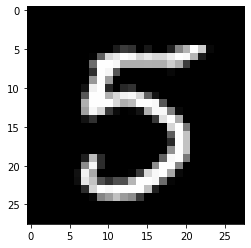

In [5]:
plt.imshow(df.iloc[1,1:].to_numpy().reshape(28,28), cmap='gray')

In [6]:
df2 = df[(df[0]==7) | (df[0]==1)]

In [7]:
df2

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19970,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19974,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19982,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19988,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df2.iloc[:, 1:]
y = df2.iloc[:, 0]

In [9]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y

2        7
11       7
12       7
18       7
27       1
        ..
19970    1
19974    1
19982    1
19988    1
19996    1
Name: 0, Length: 4369, dtype: int64

In [11]:
#kf_cv = KFold(n_splits=5, shuffle=False)
r = cross_validate(DecisionTreeClassifier(max_depth=5),
                   X,
                   y,
                   cv = 5,
                   return_estimator = True,
                   scoring = ["accuracy"],
                   return_train_score = True)

In [12]:
r

{'fit_time': array([0.48177552, 0.57882094, 0.33185959, 0.51340723, 0.31224871]),
 'score_time': array([0.02118492, 0.02356005, 0.01421952, 0.01388693, 0.01427412]),
 'estimator': [DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=5)],
 'test_accuracy': array([0.98398169, 0.97940503, 0.99084668, 0.98512586, 0.98396334]),
 'train_accuracy': array([0.9962804 , 0.99427754, 0.99513591, 0.99685265, 0.9951373 ])}

In [13]:
r['test_accuracy']

array([0.98398169, 0.97940503, 0.99084668, 0.98512586, 0.98396334])

Promedio

In [14]:
prom_test = 0
num = 0
for i in r['test_accuracy']:
  prom_test = i + prom_test
  num = num + 1
prom_test = prom_test/num
print("El promedio de test es: ", prom_test)

El promedio de test es:  0.9846645225045283


In [15]:
prom_train = 0
num = 0
for i in r['train_accuracy']:
  prom_train = i + prom_train
  num = num + 1
prom_train = prom_train/num
print("El promedio de test es: ", prom_train)

El promedio de test es:  0.9955367589528027


Desviacion estandar

In [18]:
st_dev_test = np.std(r['test_accuracy'])
print("Desviacion estandar de test: ", st_dev_test)

Desviacion estandar de test:  0.0036620225929249826


In [19]:
st_dev_train = np.std(r['train_accuracy'])
print("Desviacion estandar de train: ", st_dev_train)

Desviacion estandar de train:  0.0009154721249396056


Arboles

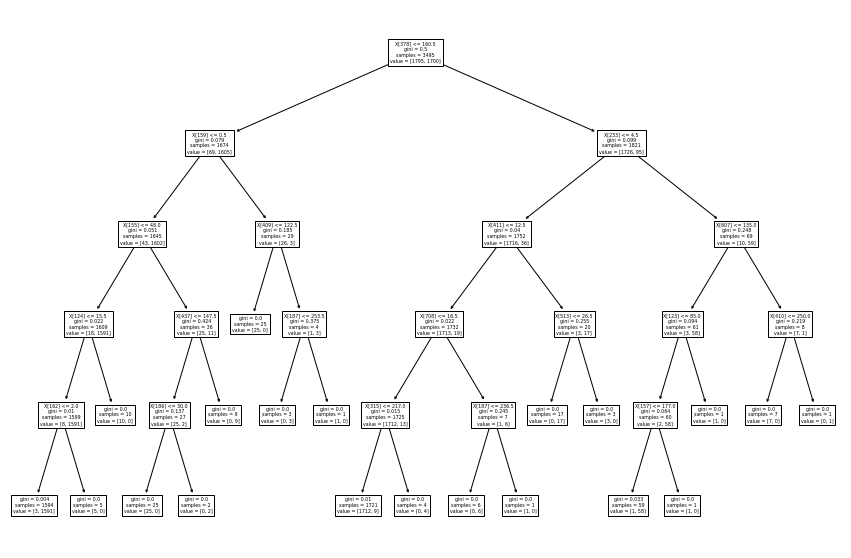

In [20]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][0])
plt.show()

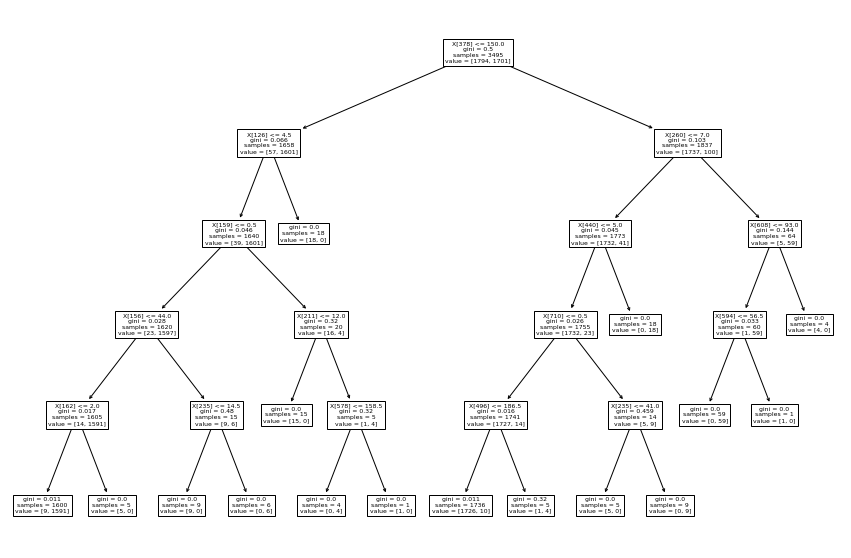

In [21]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][1])
plt.show()

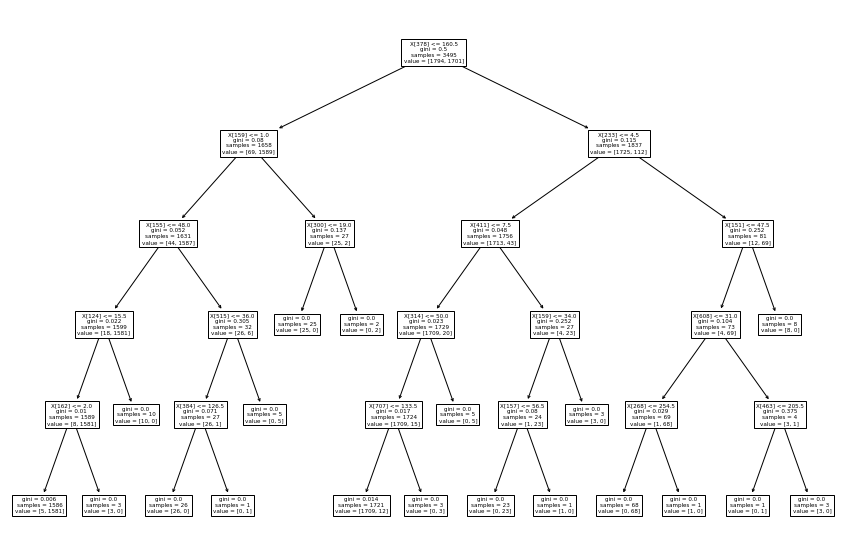

In [22]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][2])
plt.show()

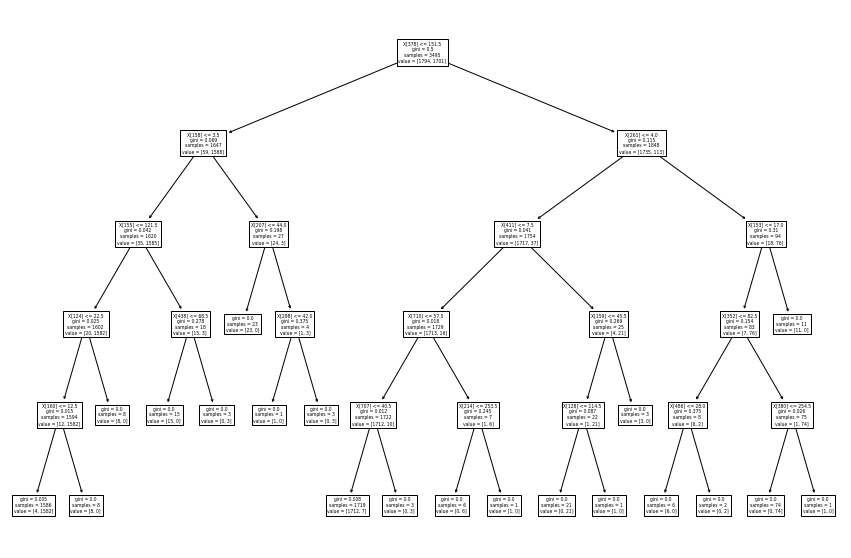

In [23]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][3])
plt.show()

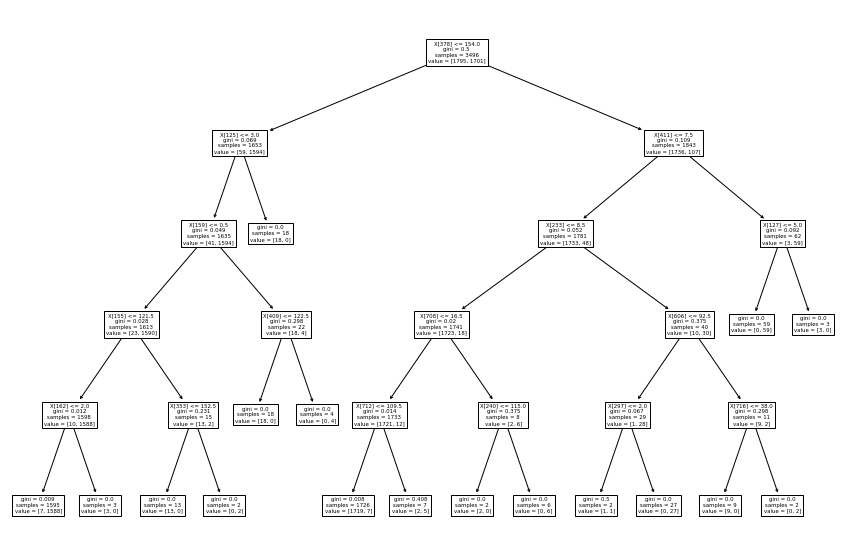

In [24]:
plt.figure(figsize=(15,10))
plot_tree(r['estimator'][4])
plt.show()